In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
pd.options.display.max_rows = None

In [3]:
data1 = pd.read_csv('nbaallelo.csv')

In [4]:
data1.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [7]:
data1['lg_id'].value_counts()

NBA    118016
ABA      8298
Name: lg_id, dtype: int64

In [14]:
data1[data1['lg_id']=='ABA'][['team_id','fran_id']].value_counts()

team_id  fran_id   
INA      Pacers        863
KEN      Colonels      846
NYA      Nets          736
DNR      Nuggets       614
VIR      Squires       536
UTS      Stars         499
CAR      Spirits       440
DLC      Spurs         433
SAA      Spurs         272
NOB      Sounds        268
SDA      Sails         263
DNA      Nuggets       194
LAS      Stars         179
SSL      Spirits       178
FLO      Floridians    178
PTP      Condors       177
MMF      Floridians    174
MMP      Sounds        172
OAK      Squires       172
PTC      Condors       168
MMT      Sounds        168
HSM      Spirits       159
WSA      Squires        91
TEX      Spurs          89
MMS      Sounds         89
MNM      Floridians     88
MNP      Condors        85
NJA      Nets           78
ANA      Stars          78
SDS      Sails          11
dtype: int64

In [16]:
data1['is_playoffs'].value_counts()

0    118248
1      8066
Name: is_playoffs, dtype: int64

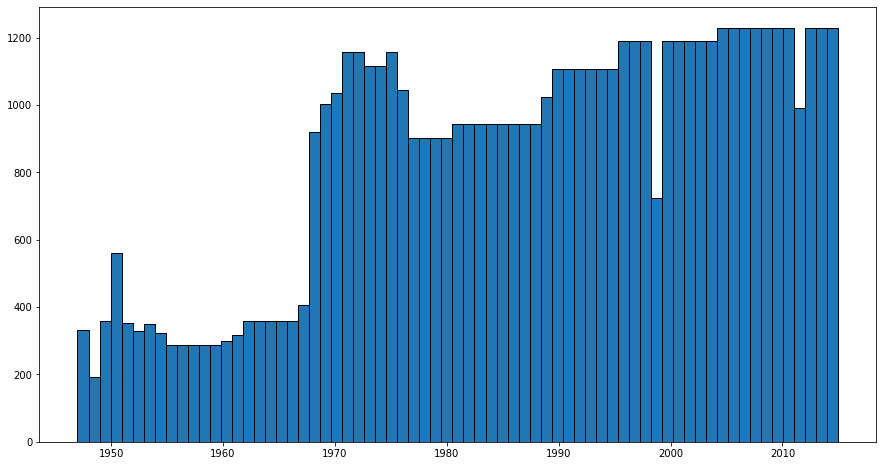

In [29]:
# take a look at the number of regular season games over the years
plt.figure(figsize = (15,8))
plt.hist(data1[(data1['_iscopy']==0) & (data1['is_playoffs']==0)]['year_id'], bins = data1[data1['_iscopy']==0]['year_id'].nunique(), edgecolor = 'black')
plt.show()

https://en.wikipedia.org/wiki/List_of_National_Basketball_Association_seasons


Has information on the number of teams and games played each season, that account for the differences seen in the plot above.

# Does a home court advantage exist?

In [31]:
data1.columns

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

In [42]:
# number of games won at home and not at home

def game_result(r):
    if r == 'L':
        return 0
    elif r == 'W':
        return 1
    return

data1['game_result2'] = data1['game_result'].apply(lambda row: game_result(row))
data1.groupby(['game_location']).sum()['game_result2']

game_location
A    23833
H    39305
N       19
Name: game_result2, dtype: int64

In [43]:
# separate by regular and postseason games
reg_season_data = data1[data1['is_playoffs'] == 0]
reg_season_data.groupby(['game_location']).sum()['game_result2']

game_location
A    22449
H    36656
N       19
Name: game_result2, dtype: int64

In [44]:
post_season_data = data1[data1['is_playoffs'] == 1]
post_season_data.groupby(['game_location']).sum()['game_result2']

game_location
A    1384
H    2649
Name: game_result2, dtype: int64

Teams playing at home win more often than teams not playing at home. 
As a hypothesis test:
H0: In the regular season, teams do not win more of the games played at home than games not played at home.
HA: In the regular season, teams have a higher probability of winning games played at home than games not played at home.

In [50]:
#take sum of wins at home, divide by games at home
reg_season_data.groupby(['game_location']).sum()['game_result2'] / reg_season_data.groupby(['game_location']).count()['game_result']
#reg_season_data.groupby(['game_location']).sum()['game_result2']
#reg_season_data.groupby(['game_location']).count()['game_result']
#take sum of wins not at home, divide by games not at home

game_location
A    0.379816
H    0.620184
N    0.500000
dtype: float64

out of all regular season games played, do the home and away teams have the same probability of winning? previous wording would not provide clean results as it would use a dataset that was not completely independant events

In [51]:
# for every game (not every row of data), create a column for whether the away or home team won
len(data1)

126314

In [52]:
data1['game_id'].nunique()

63157

In [54]:
 data1.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_result2
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN,0
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN,1
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN,1
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN,0
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN,0


# Is there a benefit to being the underdog in the playoffs?

In [56]:
playoff_data = data1[data1['is_playoffs'] == 1]
playoff_data.head(50)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_result2
662,332,194704020CLR,NBA,0,1947,4/2/1947,61,1,CLR,Rebels,...,NYK,Knicks,51,1332.1560,1316.3640,H,W,0.581291,NaN,1
663,332,194704020CLR,NBA,1,1947,4/2/1947,61,1,NYK,Knicks,...,CLR,Rebels,77,1289.1487,1304.9407,A,L,0.418709,NaN,0
664,333,194704020GSW,NBA,1,1947,4/2/1947,62,1,STB,Bombers,...,PHW,Warriors,73,1389.9673,1394.2438,A,L,0.333149,NaN,0
665,333,194704020GSW,NBA,0,1947,4/2/1947,61,1,PHW,Warriors,...,STB,Bombers,68,1369.4114,1365.1349,H,W,0.666851,NaN,1
666,334,194704020WSC,NBA,0,1947,4/2/1947,61,1,WSC,Capitols,...,CHS,Stags,81,1386.6256,1413.9667,H,L,0.791843,NaN,0
667,334,194704020WSC,NBA,1,1947,4/2/1947,62,1,CHS,Stags,...,WSC,Capitols,65,1518.7253,1491.3843,A,W,0.208157,NaN,1
668,335,194704030WSC,NBA,1,1947,4/3/1947,63,1,CHS,Stags,...,WSC,Capitols,53,1491.3843,1467.2924,A,W,0.264775,NaN,1
669,335,194704030WSC,NBA,0,1947,4/3/1947,62,1,WSC,Capitols,...,CHS,Stags,69,1413.9667,1438.0586,H,L,0.735225,NaN,0
670,336,194704050NYK,NBA,0,1947,4/5/1947,62,1,NYK,Knicks,...,CLR,Rebels,74,1304.9407,1297.5703,H,W,0.655071,NaN,1
671,336,194704050NYK,NBA,1,1947,4/5/1947,62,1,CLR,Rebels,...,NYK,Knicks,86,1316.3640,1323.7344,A,L,0.344929,NaN,0


In [ ]:
Does the team with the lower forecast or lower elo_i win the game?